<div class="alert alert-info">
    

# Assignment 4: Chicago Crimes
# MSDS420 
<br>
<br>

    
**Author:**  Atef Bader, PhD
    
<br>
</div>

# Deliverables:

- Submit two files that are labeled: <b><font color = 'red'>YourLastName_Assignment_4<b></font> that have the following formats:

 1. Your **HTML** that has your Source code and output
 2. Your **ipynb script** that has your Source code and output


# Objectives:

- Use SQL to execute different queries to retrieve data from Chicago Crime dataset and Police statins dataset
- Use Geospatial queries  to locate **police stations** and **gun** related crimes (with arrest or no arrest) in every district on **Choropleth** map
- Use Geospatial queries  to provide **descriptive stat** for every **district** on Choropleth map
- Use Geospatial queries  to locate the **Block** that is the furthest (Maximum Distance) from the police station that has gun related crime resulted in arrest


# Formatting Python Code:

When programming in Python, refer to Kenneth Reitz’ PEP 8: The Style Guide for Python Code: http://pep8.org/ (Links to an external site.)Links to an external site. There is the Google style guide for Python at https://google.github.io/styleguide/pyguide.html (Links to an external site.)Links to an external site. Comment often and in detail.



# Descriptions and Requirement Specifications

# Chicago Police Department

Chicago police department  __[CPD](https://home.chicagopolice.org/community/districts/11th-district-harrison/)__  issues and publishes on daily basis on its website crime alerts, and press releases for the different __[districts](https://home.chicagopolice.org/community/districts/)__ .

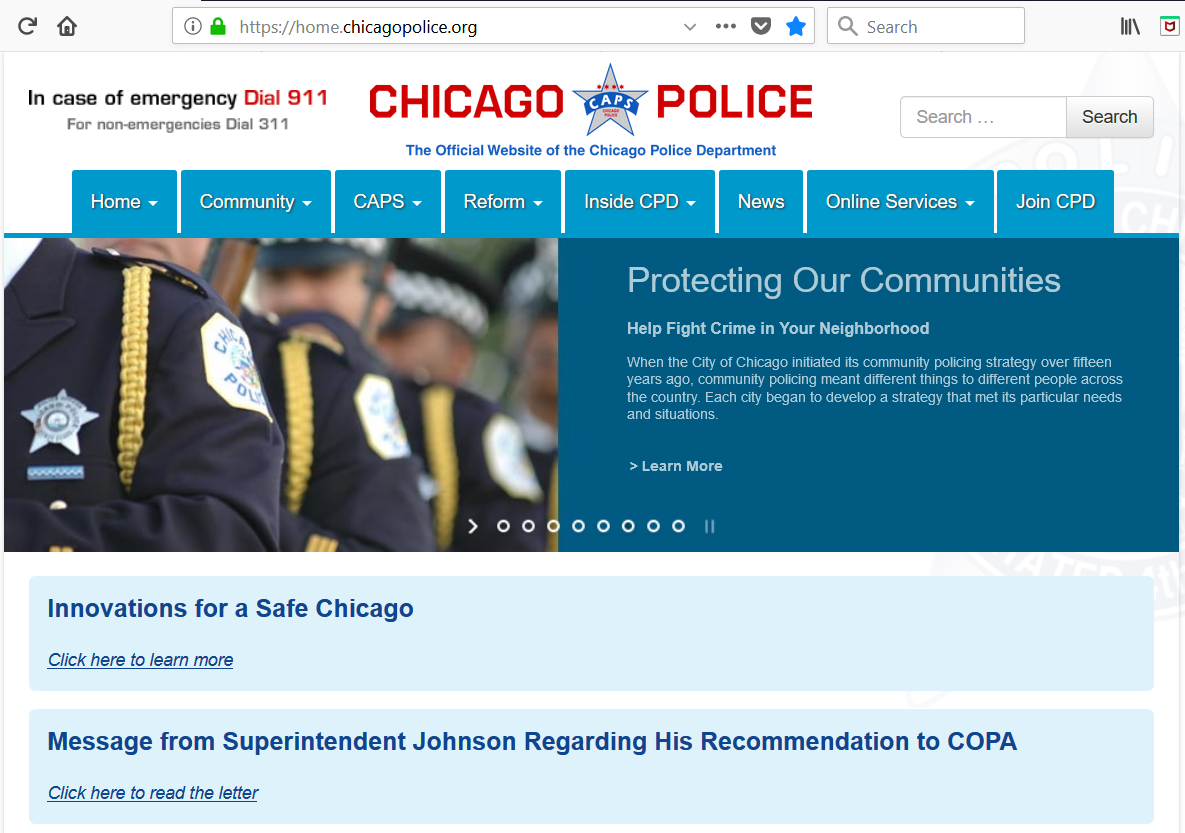



# The CPD categoizes the crimes into 8 categories as follows:

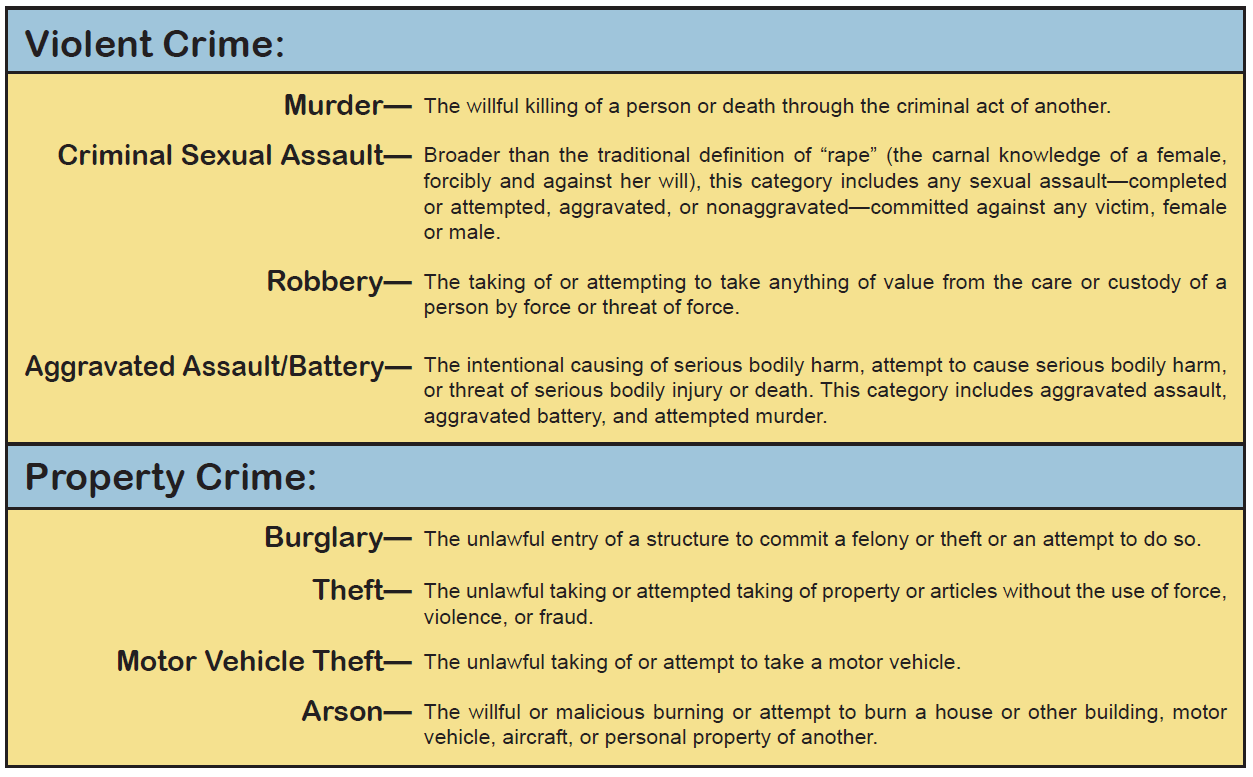


# Chicago Crimes Dataset

The crimes dataset for the city of Chicago that we will be using was obtained from the data portal for the city of Chicago. Here is the link for the city of Chicago data portal __[City of Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2)__ 

The crime dataset for the city of Chicago that we will be utilizing was sourced from the City of Chicago's data portal. Here is the link to the City of Chicago Data Portal: [City of Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2).


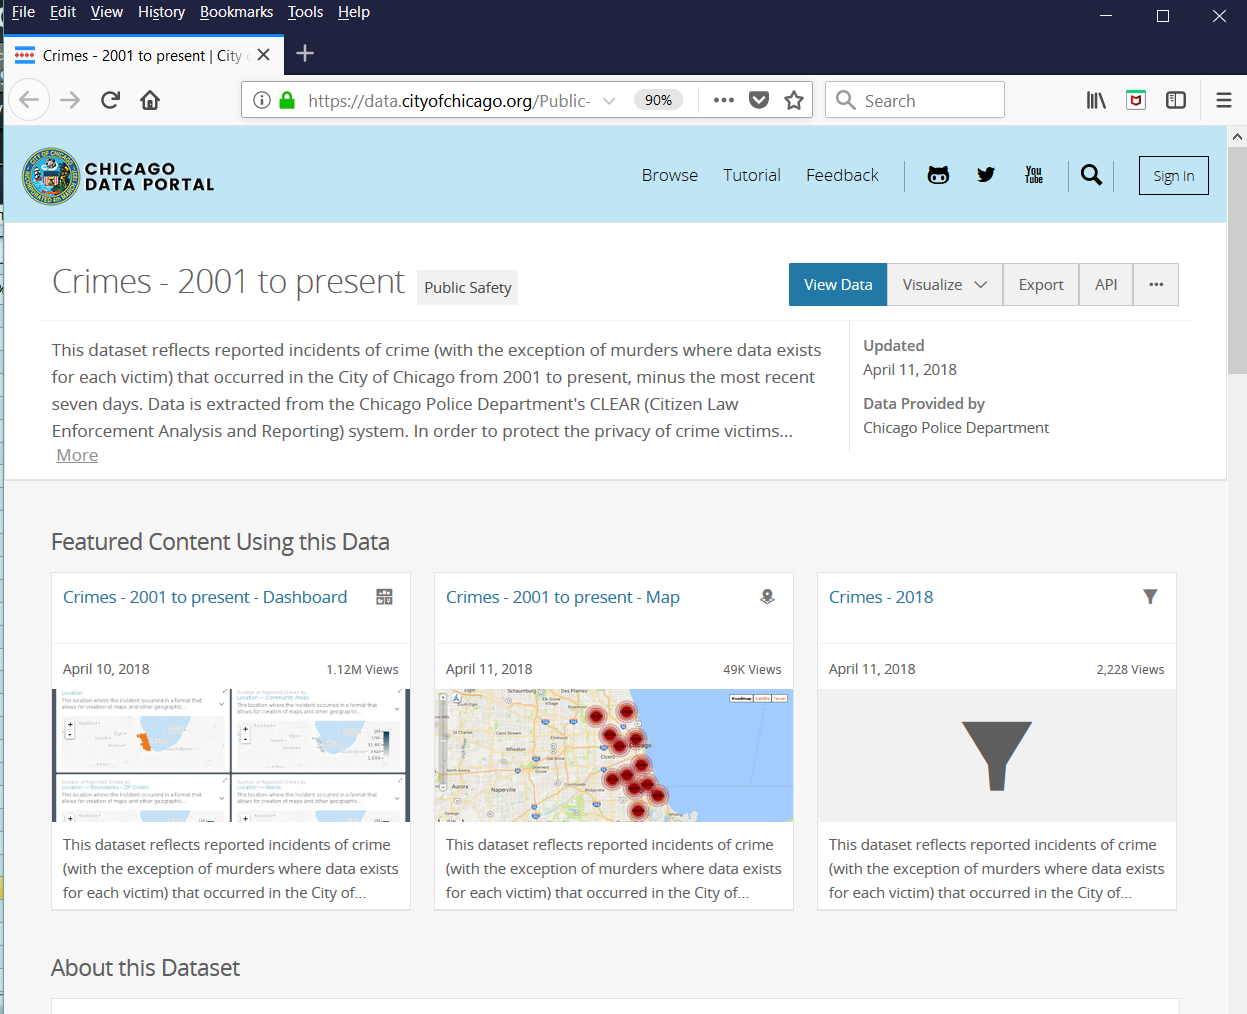

# Chicago Crimes Dataset
The crime dataset for the city of Chicago that we will be utilizing was sourced from the City of Chicago's data portal. Here is the link to the City of Chicago Data Portal: [City of Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2).

### Loading the Dataset

Three sets of data are needed for this assignment:
1. The list of Chicago police stations in each district (hosted on the NU server).
2. The Crimes dataset (hosted on the NU server).
3. The Boundaries.geojson data for district boundaries (downloaded in a Zip file).

A complete description of the dataset can be found on the Chicago City Data Portal.

In light of President Trump's State of the Union Address and the article by columnist Clarence Page, published by the Chicago Tribune, we aim to retrieve data from the past two years to perform various types of spatial queries.

We are particularly interested in a few queries to assist the Chicago Police Department (CPD) and the city of Chicago in plotting on a Choropleth map those districts with the highest gun crime rates.

Here are examples of the types of queries we are interested in:

1. Plot on a **Choropleth map** the **districts** and their **Violent Crimes**.
2. Plot on a Choropleth map the districts and their **Gun-related** crimes.
3. Identify the **crime capital** among the **Chicago districts**.
4. Determine the **crime density** per **district**.
5. Plot on a Choropleth map those **gun-related crimes** that resulted in **arrests**.
6. Plot on a Choropleth map the gun-related crime that occurred at the **farthest block** from the **police station** in each **district**.

To connect to a PostgreSQL server and load and retrieve the Chicago Crime dataset from the database, you will need the following packages:
<font color=purple>
1. **psycopg2:** This serves as the PostgreSQL driver.
2. **area:** This is used to calculate the area within any GeoJSON geometry.
3. **Folium:** This is essential for creating Choropleth maps.</font>

As we are incorporating PostGIS in our project, please read and bookmark [Chapter 4. Using PostGIS: Data Management and Queries](https://postgis.net/docs/manual-1.4/ch04.html)."

### Install These Three Packages 

Run the following three cells *once* to install these 3 packages. Afterwards, comment out the code.

In [1]:
# This script installs the 'psycopg2-binary' package, which is required for PostgreSQL database interactions.
# Note: This cell only needs to be executed once. 
# After successful installation, you can comment out this cell to avoid reinstallation in future runs.
import sys
!{sys.executable} -m pip install psycopg2-binary


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# Install the 'area' package using pip in the current Jupyter kernel.
# Note: This cell only needs to be executed once. After installation, you can comment it out or delete it to prevent repeated installations in future runs.
!{sys.executable} -m pip install area


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [3]:
# Install the 'folium' package using pip in the current Jupyter kernel.
# Note: This cell only needs to be executed once. After installation, you can comment it out or delete it to prevent repeated installations in future runs.
!{sys.executable} -m pip install folium


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [4]:
!{sys.executable} -m pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


### Import Required Libraries and Modules:

In [5]:
import folium # To create maps with the Folium library. 
from folium import plugins # To use specific plugins from Folium, like marker clustering, heatmaps, etc. 
from folium.plugins import MarkerCluster # To create marker clusters on the map. See Query 5.
import psycopg2 # PostgreSQL database adapter for Python. Used to connect to and interact with the database.
import pandas as pd
import json  #  To read the GeoJSON data (Boundaries.geojson)
from area import area # To calcuse the area of geographical regions defined in the GeoJSON file (Boundaries.geojson)
import matplotlib.pyplot as plt  # To create annual trend analysis plot.

### Check Versions:

In [6]:
folium.__version__

'0.15.1'

In [7]:
psycopg2.__version__

'2.9.9 (dt dec pq3 ext lo64)'

# Important Notes:
- In this assignment, you will connect to the DSCC PostgreSQL server, which already has the necessary database and tables set up.
- You must use your NetID (which is case-sensitive) to log in and connect to the PostgreSQL server hosted by DSCC.
- For the psycopg2.connect statements provided below, you need to enter your NetID to establish a connection with the PostgreSQL server hosted by DSCC.
- For the 'dbname' in the statements below, use 'chicago_crimes_ut' as your database when debugging/testing your code. For your final submission, switch to 'chicago_crimes' as your database.

In [8]:
# Use this dataset for your final submission of Assignment 4.
# Uncomment the following line after you have unit tested your code and are ready to run and submit your assignment on this dataset.

# db_connection = psycopg2.connect(host='129.105.248.26', dbname="chicago_crimes", user="YourNetID")

# =======================================================================================================

# Use the following dataset for unit testing purposes only.
# Comment out the following line when you are done with your unit testing and ready to run your assignment on the complete dataset and submit Assignment 4.

db_connection = psycopg2.connect(host='129.105.248.26', dbname="chicago_crimes_ut", user="esn2981")
db_connection.set_session(autocommit=True)

cursor = db_connection.cursor()


In [9]:
# If your transactions ever get "stuck":
# ...current transaction is aborted, commands ignored until end of transaction block...
# uncomment and excute the following line.
# db_connection.rollback()

### Chicago Crimes Dataset

The dataset we will be working with has been sourced from the **Chicago Data Portal** and comprises approximately 6.5 million records.

When working this dataset, it is important to consider the following:
1. Geospatial queries place significant demands on system resources, such as CPU, Memory, and Disk.
2. Our focus is on the dataset spanning the years 2016 to 2018. It should be noted that executing geospatial-type queries can considerably slow down your machine.
3. You will be using two datasets for this assignment:
    - **chicago_crimes_ut**: This smaller dataset, containing data for about a month, should be used for coding/debugging and unit testing.
    - **chicago_crimes**: This larger dataset, which includes data from 2016 to 2018, should be used for your final submission.

### Algorithm Performance

- **Sorting algorithms** used by database engines vary in efficiency, typically ranging from O($N \log N$) to O($N^2$), where $N$ is the number of records.

- **Searching algorithms** used by database engines also vary in efficiency, typically ranging from O($\log N$) to O($N$), where $N$ is the number of records.

### Let's explore the *two* tables we will be using from the Chicago crimes database.

In [10]:
# Get the column names for table crimes

cursor.execute("SELECT column_name \
    FROM INFORMATION_SCHEMA.COLUMNS \
    WHERE table_name = 'crimes';")

rows=cursor.fetchall()

rows

[('id',),
 ('caseno',),
 ('date_of_occurrence',),
 ('block',),
 ('iucr',),
 ('primary_type',),
 ('description',),
 ('location_description',),
 ('arrest',),
 ('domestic',),
 ('beat',),
 ('district',),
 ('ward',),
 ('community_area',),
 ('fbi_cd',),
 ('xcoordinate',),
 ('ycoordinate',),
 ('year',),
 ('updated_on',),
 ('latitude',),
 ('longitude',),
 ('location',),
 ('where_is',)]

In [11]:
# Get the column names for table police_stations

cursor.execute("SELECT column_name \
    FROM INFORMATION_SCHEMA.COLUMNS \
    WHERE table_name = 'police_stations';")

rows=cursor.fetchall()

rows

[('district',),
 ('district_name',),
 ('address',),
 ('city',),
 ('state',),
 ('zip',),
 ('website',),
 ('phone',),
 ('fax',),
 ('tty',),
 ('x_coordinate',),
 ('y_coordinate',),
 ('latitude',),
 ('longitude',),
 ('location',),
 ('where_is',)]

In [12]:
# Get the first five rows of the police station table
query = '''
        SELECT * 
        FROM police_stations
'''

# Execute the SQL query using the cursor object.
cursor.execute(query)

# Fetch all the rows returned by the executed query.
data = cursor.fetchall()

# Retrieve column names 
colnames = [desc[0] for desc in cursor.description]

# Create a DataFrame using the fetched data and the column names.
stations = pd.DataFrame(data, columns=colnames)

# Display the first five rows.
stations.head()

district   district_name                   address     city state    zip  \
0        1         Central           1718 S State St  Chicago    IL  60616   
1        2       Wentworth      5101 S Wentworth Ave  Chicago    IL  60609   
2        3  Grand Crossing  7040 S Cottage Grove Ave  Chicago    IL  60637   
3        4   South Chicago           2255 E 103rd St  Chicago    IL  60617   
4        5         Calumet            727 E 111th St  Chicago    IL  60628   

                                             website         phone  \
0  http://home.chicagopolice.org/community/distri...  312-745-4290   
1  http://home.chicagopolice.org/community/distri...  312-747-8366   
2  http://home.chicagopolice.org/community/distri...  312-747-8201   
3  http://home.chicagopolice.org/community/distri...  312-747-7581   
4  http://home.chicagopolice.org/community/distri...  312-747-8210   

            fax           tty  x_coordinate  y_coordinate   latitude  \
0  312-745-3694  312-745-3693   1176569.052   1891771.704  41.858373   
1  312-747-5396  312-747-6656   1175864.837   1871153.753  41.801811   
2  312-747-5479  312-747-9168   1182739.183   1858317.732  41.766431   
3  312-747-5276  312-747-9169   1193131.299   1837090.265  41.707933   
4  312-747-5935  312-747-9170   1183305.427   1831462.313  41.692723   

   longitude                         location  \
0 -87.627356   (41.8583725929, -87.627356171)   
1 -87.630560  (41.8018110912, -87.6305601801)   
2 -87.605748  (41.7664308925, -87.6057478606)   
3 -87.568349  (41.7079332906, -87.5683491228)   
4 -87.604506  (41.6927233639, -87.6045058667)   

                                            where_is  
0  0101000020E61000009AEA2C27DFED444001467E9A26E8...  
1  0101000020E6100000608FECBEA1E64440A2D015195BE8...  
2  0101000020E6100000DB984B681AE244409B14AC92C4E6...  
3  0101000020E61000005C26DC8E9DDA444010C7FCD45FE4...  
4  0101000020E61000000830B828ABD84440F6786339B0E6...

In [13]:
# store districts (excluding Headquarters) for later use
districts = stations.query("district != 'Headquarters'").district
districts

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    14
13    15
14    16
15    17
16    18
17    19
18    20
19    22
20    24
21    25
Name: district, dtype: object

In [14]:
# Display the first 5 rows in the crimes table
query = '''
        SELECT *
        FROM crimes
'''
cursor.execute(query)
data = cursor.fetchall()
colnames = [desc[0] for desc in cursor.description]
chicago = pd.DataFrame(data,columns = colnames)
chicago.head()

id    caseno  date_of_occurrence                block iucr primary_type  \
0  24368  JC103046 2019-01-03 14:37:00  050XX S INDIANA AVE  110     HOMICIDE   
1  24369  JC103046 2019-01-03 14:37:00  050XX S INDIANA AVE  110     HOMICIDE   
2  24370  JC105864 2019-01-05 16:23:00       012XX N ADA ST  110     HOMICIDE   
3  24372  JC107385 2019-01-06 22:23:00      060XX W 63RD ST  110     HOMICIDE   
4  24373  JC108358 2019-01-07 15:45:00      002XX W 87TH ST  110     HOMICIDE   

           description location_description  arrest  domestic  ...  \
0  FIRST DEGREE MURDER                 AUTO   False     False  ...   
1  FIRST DEGREE MURDER                 AUTO   False     False  ...   
2  FIRST DEGREE MURDER               STREET   False     False  ...   
3  FIRST DEGREE MURDER               STREET   False     False  ...   
4  FIRST DEGREE MURDER          PARKING LOT    True     False  ...   

   community_area  fbi_cd  xcoordinate ycoordinate  year          updated_on  \
0              38     01A    1178455.0   1871575.0  2019 2019-01-10 15:16:00   
1              38     01A    1178455.0   1871575.0  2019 2019-01-10 15:16:00   
2              24     01A    1167119.0   1908611.0  2019 2019-01-18 09:37:00   
3              64     01A    1137054.0   1862130.0  2019 2019-01-18 09:37:00   
4              44     01A    1176442.0   1847223.0  2019 2019-01-18 09:37:00   

    latitude  longitude                       location  \
0  41.802909 -87.621048   (41.802908524, -87.62104831)   
1  41.802909 -87.621048   (41.802908524, -87.62104831)   
2  41.904789 -87.661560   (41.904788891, -87.66155984)   
3  41.777831 -87.773112   (41.77783091, -87.773112387)   
4  41.736129 -87.629162  (41.736129473, -87.629162044)   

                                            where_is  
0  0101000020E6100000368AD5B4C5E64440E92B6941BFE7...  
1  0101000020E6100000368AD5B4C5E64440E92B6941BFE7...  
2  0101000020E6100000C52A521FD0F34440684915FF56EA...  
3  0101000020E61000004B2298F68FE34440ACCB63AC7AF1...  
4  0101000020E6100000CBA28F7D39DE4440D16BDC3044E8...  

[5 rows x 23 columns]

**DATA DICTIONARY (CRIMES)** (See https://www.kaggle.com/currie32/crimes-in-chicago)

**id** - Unique identifier for the record.

**caseno** - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

**date_of_occurence** - Date when the incident occurred. this is sometimes a best estimate.

**block - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

**iucr** - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.

**primary_type** - The primary description of the IUCR code.

**description** - The secondary description of the IUCR code, a subcategory of the primary description.

**location-description** - Description of the location where the incident occurred.

**arrest** - Indicates whether an arrest was made.

**domestic** - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

**beat** - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

**district** - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.

**ward** - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.

**community_area** - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.

**fbi_cd** - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

**xcoordinate** - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

**ycoordinate** - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

**year** - Year the incident occurred.

**updated_on** - Date and time the record was last updated.

**latitude** - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

**longitude** - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

**location** - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

In [15]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14436 entries, 0 to 14435
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    14436 non-null  int64         
 1   caseno                14436 non-null  object        
 2   date_of_occurrence    14436 non-null  datetime64[ns]
 3   block                 14436 non-null  object        
 4   iucr                  14436 non-null  object        
 5   primary_type          14436 non-null  object        
 6   description           14436 non-null  object        
 7   location_description  14436 non-null  object        
 8   arrest                14436 non-null  bool          
 9   domestic              14436 non-null  bool          
 10  beat                  14436 non-null  int64         
 11  district              14436 non-null  int64         
 12  ward                  14436 non-null  float64       
 13  community_area  

In [16]:
# use value_counts to see the values of the field
chicago['year'].value_counts()

year
2019    14436
Name: count, dtype: int64

In [17]:
# what is in the field domestic
chicago['domestic'].value_counts()

domestic
False    11974
True      2462
Name: count, dtype: int64

In [18]:
# let's look at how many crimes are domestic by primary type
pd.crosstab(chicago['primary_type'], chicago['domestic'], margins=True)

domestic                           False  True    All
primary_type                                         
ARSON                                 18     1     19
ASSAULT                              774   317   1091
BATTERY                             1328  1398   2726
BURGLARY                             630     7    637
CONCEALED CARRY LICENSE VIOLATION      7     0      7
CRIM SEXUAL ASSAULT                   79    15     94
CRIMINAL DAMAGE                     1289   168   1457
CRIMINAL TRESPASS                    436    25    461
DECEPTIVE PRACTICE                   785     5    790
GAMBLING                               3     0      3
HOMICIDE                              15     0     15
HUMAN TRAFFICKING                      3     0      3
INTERFERENCE WITH PUBLIC OFFICER      81     0     81
INTIMIDATION                          12     4     16
KIDNAPPING                             4     0      4
LIQUOR LAW VIOLATION                  11     0     11
MOTOR VEHICLE THEFT                  483     5    488
NARCOTICS                            933     0    933
NON-CRIMINAL                           1     0      1
OBSCENITY                              0     1      1
OFFENSE INVOLVING CHILDREN            50    49     99
OTHER OFFENSE                        678   326   1004
PROSTITUTION                          58     0     58
PUBLIC PEACE VIOLATION                63     1     64
ROBBERY                              513    11    524
SEX OFFENSE                           41     3     44
STALKING                               7     2      9
THEFT                               3300   124   3424
WEAPONS VIOLATION                    372     0    372
All                                11974  2462  14436

In [19]:
# percentages would be more informative
# ------ lambda expressions section 4.7.6 ('syntactic sugar for a normal function definition')
# https://docs.python.org/3/tutorial/controlflow.html
pd.crosstab(chicago['primary_type'], chicago['domestic']).apply(lambda x: x/x.sum(), axis = 1)

domestic                              False     True 
primary_type                                         
ARSON                              0.947368  0.052632
ASSAULT                            0.709441  0.290559
BATTERY                            0.487161  0.512839
BURGLARY                           0.989011  0.010989
CONCEALED CARRY LICENSE VIOLATION  1.000000  0.000000
CRIM SEXUAL ASSAULT                0.840426  0.159574
CRIMINAL DAMAGE                    0.884695  0.115305
CRIMINAL TRESPASS                  0.945770  0.054230
DECEPTIVE PRACTICE                 0.993671  0.006329
GAMBLING                           1.000000  0.000000
HOMICIDE                           1.000000  0.000000
HUMAN TRAFFICKING                  1.000000  0.000000
INTERFERENCE WITH PUBLIC OFFICER   1.000000  0.000000
INTIMIDATION                       0.750000  0.250000
KIDNAPPING                         1.000000  0.000000
LIQUOR LAW VIOLATION               1.000000  0.000000
MOTOR VEHICLE THEFT                0.989754  0.010246
NARCOTICS                          1.000000  0.000000
NON-CRIMINAL                       1.000000  0.000000
OBSCENITY                          0.000000  1.000000
OFFENSE INVOLVING CHILDREN         0.505051  0.494949
OTHER OFFENSE                      0.675299  0.324701
PROSTITUTION                       1.000000  0.000000
PUBLIC PEACE VIOLATION             0.984375  0.015625
ROBBERY                            0.979008  0.020992
SEX OFFENSE                        0.931818  0.068182
STALKING                           0.777778  0.222222
THEFT                              0.963785  0.036215
WEAPONS VIOLATION                  1.000000  0.000000

## Lets start executing different  Queries

# Query #1:
- Calculate the total number of **crimes** in each district and display this data on a Choropleth map. Essentially, create a Choropleth map where the shading of each district corresponds to the number of **crimes** in that district.

In [20]:
# Retrieve the total number of crimes for each district.
# As each row in the database represents a single crime, count the number of rows associated with each district.

cursor.execute("SELECT district, count(district) \
                FROM crimes \
                GROUP BY district")
rows = cursor.fetchall()

In [21]:
# Create a dataframe from the results of the query.
crimes_per_district = pd.DataFrame(rows, columns=['dist_num','number_of_crimes'])
crimes_per_district['dist_num'] = crimes_per_district['dist_num'].astype(str)

crimes_per_district

dist_num  number_of_crimes
0        24               412
1        11              1113
2         8               886
3        19               608
4        25               726
5         4               790
6        14               508
7         3               695
8        17               386
9        20               254
10       22               442
11        9               585
12       10               779
13        7               745
14        1               854
15        5               635
16       18               869
17        2               602
18       16               473
19       15               530
20        6               844
21       12               700

In [22]:
# Retrieve the latitude and longitude of the police station in each district, excluding the headquarters.
# These coordinates will typically be used to place markers on the map at the locations of the police stations.
cursor.execute("""SELECT ST_X(ST_AsText(Where_IS)), ST_Y(ST_AsText(Where_IS)), district \
            FROM police_stations \
            WHERE district!='Headquarters'""")
police_stations = cursor.fetchall()

# Create a dataframe with this information.
station_locations = pd.DataFrame(police_stations,columns=['st_latitude','st_longitude','dist_num']).drop_duplicates()

station_locations


st_latitude  st_longitude dist_num
0     41.858373    -87.627356        1
1     41.801811    -87.630560        2
2     41.766431    -87.605748        3
3     41.707933    -87.568349        4
4     41.692723    -87.604506        5
5     41.752137    -87.644229        6
6     41.779632    -87.660887        7
7     41.778987    -87.708864        8
8     41.837394    -87.646408        9
9     41.856685    -87.708382       10
10    41.873582    -87.705488       11
11    41.862977    -87.656973       12
12    41.921103    -87.697452       14
13    41.880083    -87.768200       15
14    41.974094    -87.766149       16
15    41.966053    -87.728115       17
16    41.903242    -87.643352       18
17    41.947400    -87.651512       19
18    41.979550    -87.692845       20
19    41.691435    -87.668520       22
20    41.999763    -87.671324       24
21    41.918609    -87.765574       25

In [23]:
# Add columns to store the coordinates of each district.
# These coordinates will represent the locations of our markers.

query1_df = pd.merge(crimes_per_district, station_locations,on='dist_num')
query1_df

dist_num  number_of_crimes  st_latitude  st_longitude
0        24               412    41.999763    -87.671324
1        11              1113    41.873582    -87.705488
2         8               886    41.778987    -87.708864
3        19               608    41.947400    -87.651512
4        25               726    41.918609    -87.765574
5         4               790    41.707933    -87.568349
6        14               508    41.921103    -87.697452
7         3               695    41.766431    -87.605748
8        17               386    41.966053    -87.728115
9        20               254    41.979550    -87.692845
10       22               442    41.691435    -87.668520
11        9               585    41.837394    -87.646408
12       10               779    41.856685    -87.708382
13        7               745    41.779632    -87.660887
14        1               854    41.858373    -87.627356
15        5               635    41.692723    -87.604506
16       18               869    41.903242    -87.643352
17        2               602    41.801811    -87.630560
18       16               473    41.974094    -87.766149
19       15               530    41.880083    -87.768200
20        6               844    41.752137    -87.644229
21       12               700    41.862977    -87.656973

# Creating the folium maps

In [24]:
# Create a Folium map centered on Downtown Chicago.
total_number_of_crimes_per_district_map = folium.Map(location = (41.8781, -87.6298),zoom_start = 11)

In [25]:
# Load district boundaries from "Boundaries.geojson" file.
# Utilize this data to overlay district regions onto the folium map.
# Apply a choropleth layer to the map to visualize crime data.
# Each district will be shaded in "orange red", with the color intensity representing the crime rate.
# The number of crimes in each district is specified in the 'number_of_crimes' column 
# of the 'crimes_per_district' data frame.
# This choropleth layer visually encodes the crime data, 
# providing a geographical representation of crime rates by district.

folium.Choropleth(
    geo_data="Boundaries.geojson",  # GeoJSON file containing district boundaries
    fill_color='OrRd',  # Shade districts in orange red gradient
    fill_opacity=0.5,   # Set fill opacity for the shaded areas
    line_opacity=1,     # Set line opacity for district boundaries
    data=crimes_per_district,  # Data source for crime statistics
    key_on='feature.properties.dist_num',  # GeoJSON property to match the district number
    columns=['dist_num', 'number_of_crimes'],  # Columns for district number and crime count
    legend_name="CRIMES PER DISTRICT"  # Title for the map legend
).add_to(total_number_of_crimes_per_district_map)  # Add the choropleth layer to the folium map


In [26]:
# We iterate over the rows in the dataframe, 'query1_df'.
# For each row, we create a marker representing a police station.
# The popup label for each marker displays the district number and the total number of crimes in that district.
# Each marker is placed at the corresponding latitude and longitude coordinates of the police station.
for index, row in query1_df.iterrows():
    # Extracting the latitude and longitude of the police station from the row.
    police_station_location = (row['st_latitude'], row['st_longitude'])
    # Extracting the district number and number of crimes from the row.
    district = row['dist_num']
    num_crimes = row['number_of_crimes']
            
    # Creating a marker with a popup that shows the district number and number of crimes.
    # The marker is then added to the 'total_number_of_crimes_per_district_map' map.
    folium.Marker(
        location=police_station_location, 
        popup=folium.Popup(html=f"District No : {district} has Total Number of Crimes: {num_crimes}", max_width=450)
    ).add_to(total_number_of_crimes_per_district_map)


- **Lets plot the Choropleth map and notice  the intensity of color on the different districts**
- **The Blue POPUP represents the location of police station in the different districts in the map**

In [27]:
# Display the finished map.
total_number_of_crimes_per_district_map

## Query #2:
* Calculate the total number of **violent crimes** in each district and display it on a Choropleth map, where the shading intensity corresponds to the number of violent crimes in each district. A crime is classified as a **violent crime** if its PRIMARY_TYPE is `THEFT`, `ASSAULT`, `ROBBERY`, `KIDNAPPING`, `CRIM SEXUAL ASSAULT`, `BATTERY`, or `MURDER`.

* Additionally, calculate the total number of crimes for each of these primary types of violent crime within each district. Then, add a popup marker at the location of each district's police headquarters on the map. This popup should show a DataFrame detailing the counts of each type of violent crime in that district.

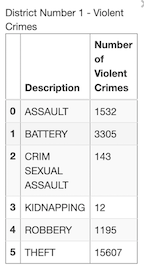

In [28]:
violent_crime_categories = 'THEFT','ASSAULT','ROBBERY','KIDNAPPING','CRIM SEXUAL ASSAULT','BATTERY','MURDER'

In [29]:
# Get the total number of violent crimes per district. This info will populate the legend.
cursor.execute("SELECT district, count(district)\
                FROM crimes \
                WHERE PRIMARY_TYPE in %s \
                GROUP BY district",[violent_crime_categories])
rows=cursor.fetchall()
violent_crime_per_district=pd.DataFrame(rows, columns=['dist_num','number_of_violent_crimes'])
violent_crime_per_district['dist_num'] = violent_crime_per_district['dist_num'].astype(str)
violent_crime_per_district

dist_num  number_of_violent_crimes
0         8                       488
1        11                       407
2        24                       216
3        19                       368
4        25                       362
5         4                       400
6        14                       309
7         3                       387
8        17                       220
9        20                       147
10       22                       217
11        9                       312
12        7                       367
13       10                       362
14        1                       624
15        5                       293
16       18                       605
17        2                       349
18       16                       252
19       15                       291
20        6                       457
21       12                       430

Now, lets create a dataframe of the **different types of violent crimes for every district** 

In [30]:
cursor.execute(f"SELECT district, PRIMARY_TYPE, count(PRIMARY_TYPE) \
                    FROM crimes \
                    WHERE PRIMARY_TYPE in {violent_crime_categories} \
                    GROUP BY distrIct,PRIMARY_TYPE")
rows=cursor.fetchall()
violent_crime_type = pd.DataFrame(rows, columns=['dist_num','Description','number_of_violent_crimes'])
violent_crime_type['dist_num'] = violent_crime_type['dist_num'].astype(str)
violent_crime_type

dist_num          Description  number_of_violent_crimes
0         24              ROBBERY                        15
1          3  CRIM SEXUAL ASSAULT                         9
2          8              BATTERY                       174
3         12              ASSAULT                        38
4         18                THEFT                       417
..       ...                  ...                       ...
108        5              BATTERY                       123
109       10              ASSAULT                        63
110       18              ROBBERY                        33
111        5              ASSAULT                        62
112       22  CRIM SEXUAL ASSAULT                         2

[113 rows x 3 columns]

In [31]:
# This time our dataframe will contain one row for each district and each type of violent crime.
# For each distrct number and type of violent crime our dataframe will have the total of violent crimes of that type.
# Include station locations in the dataframe, as these locations will be used for placing markers on the map.
query2_df = pd.merge(violent_crime_type, station_locations,on='dist_num')
query2_df

dist_num          Description  number_of_violent_crimes  st_latitude  \
0         24              ROBBERY                        15    41.999763   
1         24                THEFT                        96    41.999763   
2         24              BATTERY                        79    41.999763   
3         24              ASSAULT                        23    41.999763   
4         24  CRIM SEXUAL ASSAULT                         3    41.999763   
..       ...                  ...                       ...          ...   
108       14  CRIM SEXUAL ASSAULT                         3    41.921103   
109       14              ASSAULT                        31    41.921103   
110       14              ROBBERY                        16    41.921103   
111       14              BATTERY                        48    41.921103   
112       14                THEFT                       211    41.921103   

     st_longitude  
0      -87.671324  
1      -87.671324  
2      -87.671324  
3      -87.671324  
4      -87.671324  
..            ...  
108    -87.697452  
109    -87.697452  
110    -87.697452  
111    -87.697452  
112    -87.697452  

[113 rows x 5 columns]

In [32]:
districts

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    14
13    15
14    16
15    17
16    18
17    19
18    20
19    22
20    24
21    25
Name: district, dtype: object

# Creating the folium maps

In [33]:
# Load district boundaries from "Boundaries.geojson" file.
# Utilize this data to overlay district regions onto the folium map.
# Apply a choropleth layer to the map to visualize crime data.
# Each district will be shaded in "orange red", with the color intensity representing the *violent crime* rate.
# The number of violent crimes in each district is specified in the 'number_of_violent_crimes' column 
# of the 'violent_crime_per_district' dataframe.
# This choropleth layer visually encodes the crime data, 
# providing a geographical representation of the *violent crime* rates by district.

violent_crimes_per_district_map= folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = violent_crime_per_district, #data source changed from first example
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'number_of_violent_crimes'],
              legend_name = "VIOLENT CRIMES PER DISTRICT"
              ).add_to(violent_crimes_per_district_map)

In addition, for each district find the block(s) that has the highest number of gun crimes in that district. Note that there might be a tie for the highest number of gun crimes. You need to find **all** such blocks. Add a popup marker (located at that district's police headquarter) that displays a DataFrame containing all such block along with the number of gun crimes for that block (i.e. the highest number of crimes for a district).

In [34]:
# Iterate over the unique district numbers in query2_df.
for district in districts:
    # Filter rows in query2_df for the current district.
    df2d = query2_df[query2_df.dist_num == district]  # Dataframe for the current district.

    # Retrieve the first set of latitude and longitude values for the police station's location.
    police_station_location = tuple(df2d[['st_latitude', 'st_longitude']].values[0])

    # Create a new dataframe with descriptions and numbers of violent crimes for the district.
    violent_crimes_per_district_df = df2d[['Description', 'number_of_violent_crimes']]
    
    # Convert the dataframe to HTML format for displaying in the marker popup.
    header = violent_crimes_per_district_df.to_html(classes='table table-striped table-hover table-condensed table-responsive')
    
    # Create a folium marker for the district with a popup showing violent crime details.
    # The popup contains the district number and a table of violent crimes.
    folium.Marker(
        location=police_station_location, 
        popup=folium.Popup(html=f"District Number {district} - Violent Crimes {header}", max_width=450)
    ).add_to(violent_crimes_per_district_map)


In [35]:
# Display the finished map.
violent_crimes_per_district_map

## Query #3:
* Calculate the total number of **gun-related violent crimes** in each district and display the data in a table on a Choropleth map. 
* A crime is classified as a **gun-related violent crime** if its DESCRIPTION contains the word "gun" and its PRIMARY_TYPE is one of the following: `THEFT`, `ASSAULT`, `ROBBERY`, `KIDNAPPING`, `CRIM SEXUAL ASSAULT`, `BATTERY`, or `MURDER`.

* Furthermore, determine the total number of crimes for each specific DESCRIPTION containing the word "gun" within each district. 
* Then, add a popup marker at the location of each district's police headquarters on the map. This popup should show a DataFrame detailing the counts of each type of gun-related violent crime based on their DESCRIPTION in that district.

First, let's create a DataFrame to analyze the number of **violent gun crimes** in each district, giving us an idea of the **violent gun crime** distribution by district.

In [36]:
# isolate violent gun crime
gun='%GUN%'
cursor.execute(f"SELECT district, count(district)\
                FROM crimes\
                WHERE PRIMARY_TYPE in {violent_crime_categories}\
                AND DESCRIPTION::text LIKE '{gun}' GROUP BY district")
districts_violent_gun_crimes = cursor.fetchall()
districts_violent_gun_crimes_df = pd.DataFrame(districts_violent_gun_crimes, columns=['dist_num','violent_gun_crimes'])
districts_violent_gun_crimes_df['dist_num'] = districts_violent_gun_crimes_df['dist_num'].astype(str)
districts_violent_gun_crimes_df.head()

dist_num  violent_gun_crimes
0       24                   9
1        8                  38
2       11                  36
3       19                   9
4       25                  25

Now, lets create a dataframe of the **different types of violent gun crimes for every district** 

In [37]:
cursor.execute(f"SELECT district, DESCRIPTION, count(DESCRIPTION) \
                FROM crimes \
                WHERE PRIMARY_TYPE in {violent_crime_categories} AND DESCRIPTION::text LIKE '{gun}' \
                GROUP BY district, DESCRIPTION")
rows=cursor.fetchall()
violent_gun_crime_type = pd.DataFrame(rows, columns=['dist_num','Description','number_of_violent_gun_crimes'])
violent_gun_crime_type['dist_num'] = violent_gun_crime_type['dist_num'].astype(str)
violent_gun_crime_type.head()

dist_num             Description  number_of_violent_gun_crimes
0        8          ARMED: HANDGUN                            23
1       11     AGGRAVATED: HANDGUN                            15
2        6     AGGRAVATED: HANDGUN                            15
3       20  ATTEMPT: ARMED-HANDGUN                             1
4       19     AGGRAVATED: HANDGUN                             5

In [38]:
query3_df = pd.merge(violent_gun_crime_type, station_locations, on = 'dist_num')
query3_df.head()

dist_num             Description  number_of_violent_gun_crimes  st_latitude  \
0        8          ARMED: HANDGUN                            23    41.778987   
1        8  ATTEMPT: ARMED-HANDGUN                             2    41.778987   
2        8     AGGRAVATED: HANDGUN                            13    41.778987   
3       11     AGGRAVATED: HANDGUN                            15    41.873582   
4       11          ARMED: HANDGUN                            19    41.873582   

   st_longitude  
0    -87.708864  
1    -87.708864  
2    -87.708864  
3    -87.705488  
4    -87.705488

# Creating the folium maps

In [39]:
# Load district boundaries from "Boundaries.geojson" file.
# Utilize this data to overlay district regions onto the folium map.
# Apply a choropleth layer to the map to visualize crime data.
# Each district will be shaded in "orange red", with the color intensity representing the *violent gun crime* rate.
# The number of violent crimes in each district is specified in the 'violent_gun_crimes' column 
# of the 'districts_violent_gun_crimes_df' dataframe.
# This choropleth layer visually encodes the crime data, 
# providing a geographical representation of the *violent gun crime* rates by district.
districts_violent_gun_crimes_map = folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = districts_violent_gun_crimes_df,
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'violent_gun_crimes'],
              legend_name="VIOLENT GUN CRIME"
              ).add_to(districts_violent_gun_crimes_map)

In [40]:
# districts = query3_df.dist_num.unique()
for district in districts:
    df3d = query3_df[query3_df.dist_num == district]
  
    police_station_location = tuple(df3d[['st_latitude','st_longitude']].values[0])

    violent_gun_crimes_per_district_df = df3d[['Description','number_of_violent_gun_crimes']]
    
    header = violent_gun_crimes_per_district_df.to_html(classes=
                    'table table-striped table-hover table-condensed table-responsive')


    folium.Marker(location = police_station_location, 
    popup =\
    folium.Popup(html=f"District No : {district} - Violent Gun Crimes {header}",max_width=450)).\
    add_to(districts_violent_gun_crimes_map)

In [41]:
districts_violent_gun_crimes_map

## Query #4:
- Calculate the crime density per district

In [42]:
district = []
tarea=[]

with open('Boundaries.geojson') as f:
    data = json.load(f)
    a = data['features'] # a is a list of district data (dictionaries)
    for i in range(len(a)):
        obj = a[i]['geometry'] # list of coordinates defining the ith district boundary
        n = a[i]['properties'] # dictionary with district number and district label keyes for ith district
        district.append(n['dist_num']) # add district number to the district list
        tarea.append(area(obj)/10000) # add the the area (in hectares) to area list

af = pd.DataFrame({'dist_num': district,'district_area_inHectares':tarea})
af['dist_num'] = af['dist_num'].astype(str)
final_data= pd.merge(af, crimes_per_district, on='dist_num', how='inner')

# get crime density as number of crimes per 100 hectare
final_data['crimes/100ha'] = round(final_data['number_of_crimes']/(final_data['district_area_inHectares']/100))
final_data

dist_num  district_area_inHectares  number_of_crimes  crimes/100ha
0        17               2492.727155               386          15.0
1        20               1132.170216               254          22.0
2        19               2225.035732               608          27.0
3        25               2827.989237               726          26.0
4        14               1555.869965               508          33.0
5         7               1688.670732               745          44.0
6         3               1576.063931               695          44.0
7         4               7068.152865               790          11.0
8         6               2099.682124               844          40.0
9        22               3490.416073               442          13.0
10        5               3318.613379               635          19.0
11       24               1406.081387               412          29.0
12       16               8171.776367               473           6.0
13        8               5992.169760               886          15.0
14       18               1215.520046               869          71.0
15       12               2509.453028               700          28.0
16       11               1582.727274              1113          70.0
17       15                989.631393               530          54.0
18       10               2038.988883               779          38.0
19        1               1214.818895               854          70.0
20        9               3505.216898               585          17.0
21        2               1949.690970               602          31.0

## Query #5:
- Create **Marker Clusters** on Choropleth map for those **gun related crimes** that resulted in **arrest (green icon)** and those that **didn't (red icon)**

In [43]:
# isolate gun crime
gun='%GUN%'
cursor.execute(f"SELECT district, count(district)\
                FROM crimes\
                WHERE DESCRIPTION::text LIKE '{gun}' GROUP BY district")
districts_gun_crimes = cursor.fetchall()
districts_gun_crimes_df = pd.DataFrame(districts_gun_crimes, columns=['dist_num','gun_crimes'])
districts_gun_crimes_df['dist_num'] = districts_gun_crimes_df['dist_num'].astype(str)
districts_gun_crimes_df.head()

dist_num  gun_crimes
0       24           9
1        8          49
2       11          69
3       19          11
4       25          43

In [44]:
# This time our dataframe will contain one row for each district and each block in the district.
# Each row contains information about a particular gun crime including the block in which the crime occured.
# We also save the location of the crime incidendent and whether there was an arrest.
# We will use this information when creating the markers. 
# In particular, markers will be positioned at the *crime location* instead of police station location.
data= []
for district in districts:
    cursor.execute(f"""SELECT  DISTINCT ON(caseno) caseno, block, DESCRIPTION, arrest,latitude,longitude\
                FROM crimes\
                WHERE district = {district} and DESCRIPTION::text LIKE '{gun}'""")
    results = cursor.fetchall()
    
    # insert the district number as the first element of each result list
    gun_crimes_per_district = [[district]+list(result) for result in results]
    data += (gun_crimes_per_district)

gun_crimes_per_district_df = pd.DataFrame(data, columns=['dist_num','caseno','block',\
'Description','arrest', 'latitude', 'longitude'])
gun_crimes_per_district_df['dist_num'] = gun_crimes_per_district_df['dist_num'].astype(str)
gun_crimes_per_district_df.shape

(745, 7)

In [45]:
gun_crimes_per_district_df.head()

dist_num    caseno                 block               Description  arrest  \
0        1  JC105034  004XX W VAN BUREN ST       AGGRAVATED: HANDGUN   False   
1        1  JC111601      008XX S PARK TER    ATTEMPT: ARMED-HANDGUN   False   
2        1  JC111881     0000X W QUINCY ST    ATTEMPT: ARMED-HANDGUN   False   
3        1  JC118978  022XX S MICHIGAN AVE       AGGRAVATED: HANDGUN    True   
4        1  JC119606   029XX S DEARBORN ST  UNLAWFUL POSS OF HANDGUN    True   

    latitude  longitude  
0  41.876794 -87.637817  
1  41.871096 -87.629570  
2  41.878802 -87.627917  
3  41.852284 -87.623790  
4  41.841856 -87.628742

# Creating the folium maps

In [46]:
# Load district boundaries from "Boundaries.geojson" file.
# Utilize this data to overlay district regions onto the folium map.
# Apply a choropleth layer to the map to visualize crime data.
# Each district will be shaded in "orange red", with the color intensity representing the *gun crime* rate.
# The number of violent crimes in each district is specified in the 'gun_crimes' column 
# of the 'districts_gun_crimes_df' dataframe.
# This choropleth layer visually encodes the crime data, 
# providing a geographical representation of the *gun crime* rates by district.
gun_crime_arrests_map = folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = districts_gun_crimes_df, #using data from Query 3
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'gun_crimes'],
              legend_name="GUN CRIME"
              ).add_to(gun_crime_arrests_map)
marker_cluster = MarkerCluster().add_to(gun_crime_arrests_map)

In [47]:
# We create a marker for each gun crime--"green" if there was an arrest and "red" otherwise.

gun='%GUN%'
for district in districts:
    gun_crimes_per_district_df2 = gun_crimes_per_district_df[gun_crimes_per_district_df.dist_num==district]
    
    for index, row in gun_crimes_per_district_df2.iterrows():
        description = row['Description']
        block = row['block']
        loc = (row['latitude'],row['longitude'])

        if row['arrest']==True: 
            folium.Marker(location=loc,popup = folium.Popup(html=\
                f"District No: {district} <br> Description: {description} <br> Block: {block}"),\
                          icon=folium.Icon(color='green', icon='ok-sign'),).add_to(marker_cluster)

        else:
            folium.Marker(location=loc, popup = folium.Popup(html=
                 f"District No: {district} <br> Description: {description} <br> Block: {block}"),\
                          icon=folium.Icon(color='red',icon='remove-sign'),).add_to(marker_cluster)
 

In [48]:
gun_crime_arrests_map

## Query #6:
- Plot on Choropleth map the **farthest Block** that has a gun crime from every police station in every district 

Locate the **farthest** gun crime from the police station in every district. Create a Choropleth map where the districts are shaded in proportion to the number of **gun crimes** in that district. For each district, find the gun crime that was **farthest** from police station. Add a pop-up on the Choropleth map to display the district number and the Block where the **farthest** gun crime occurred. Also add circle marker (of radius 5) at the location of the **farthest** gun crime.

In [49]:
# This query finds, for each block in each district, the gun crime that occurred at the greatest distance from the police station.
# It also records this distance along with the location of the police station.
# Markers will be placed at the police station locations.

results = []

for district in districts:
    # Select the farthest gun crime for each block in the district
    query = '''
    SELECT DISTINCT ON (A.block) A.district, A.block, A.where_is, ST_Distance(A.where_is, B.where_is)
                      FROM crimes AS A, police_stations AS B 
                      WHERE A.district = %s AND DESCRIPTION::text LIKE %s AND B.district = %s
                      AND ST_Distance(A.where_is, B.where_is) IN 
                          (SELECT MAX(dist) 
                           FROM (SELECT ST_Distance(A.where_is, B.where_is) AS dist 
                                 FROM crimes AS A, police_stations AS B 
                                 WHERE A.district = %s AND DESCRIPTION::text LIKE %s AND B.district = %s) AS f)
    
    '''
    cursor.execute(query, [district, gun, district, district, gun, district])

    farthest_block_gun_crime = list(cursor.fetchall()[0])

    # Fetch latitude and longitude for the location of the farthest gun crime
    cursor.execute(f"SELECT ST_X(ST_AsText(%s)), ST_Y(ST_AsText(%s))", 
                   (farthest_block_gun_crime[2], farthest_block_gun_crime[2]))
    farthest_block_gun_crime[2:3] = cursor.fetchall()[0]
    
    results.append(farthest_block_gun_crime)

# Create a DataFrame from the results
farthest_gun_crime_df = pd.DataFrame(results, columns=['dist_num', 'block', 'crime_lat', 'crime_long', 'distance'])
farthest_gun_crime_df['dist_num'] = farthest_gun_crime_df['dist_num'].astype(str)

# Merge with the station locations data
query6_df = pd.merge(farthest_gun_crime_df, station_locations, on='dist_num')
query6_df.head()


dist_num                 block  crime_lat  crime_long     distance  \
0        1  004XX W VAN BUREN ST  41.876794  -87.637817  1171.461889   
1        2   055XX S EVERETT AVE  41.794425  -87.582519  5365.880774   
2        3       026XX E 75TH ST  41.759100  -87.560145  5093.598187   
3        4     101XX S EWING AVE  41.711374  -87.535281  3693.438062   
4        5     118XX S LAFLIN ST  41.678829  -87.658995  6086.359525   

   st_latitude  st_longitude  
0    41.858373    -87.627356  
1    41.801811    -87.630560  
2    41.766431    -87.605748  
3    41.707933    -87.568349  
4    41.692723    -87.604506

# Creating the folium maps

In [50]:
# Create a folium map centered on "downtown Chicago". The boundaries of each distrct are stored in "Boundaries.geojson". 
# Use this data to draw the district regions on the folium map.
# Then shade each region "orange red" with the intensity of the color corresponding to the number of crimes.
# Remember the number of crimes per district is stored in the number_of_crimes column of crimes_per_district.
# We add this "choropleth layer" to our folium map.
farthest_block_gun_crime_map = folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = districts_gun_crimes_df,
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'gun_crimes'],
              legend_name="GUN CRIME"
              ).add_to(farthest_block_gun_crime_map)

 

In [51]:
# This time we place a circle markers at the crime locations in addition to the "regular" markers at the
# police station locations.

for district in districts:

    data = query6_df.loc[query6_df.dist_num == district]

    block, crime_lat, crime_long, dist, police_lat, police_long =\
    data['block'].values[0], data['crime_lat'].values[0], data['crime_long'].values[0],\
    data['dist_num'].values[0], data['st_latitude'].values[0], data['st_longitude'].values[0]
    
    # Add a circle marker for the crime location
    folium.CircleMarker((crime_lat, crime_long), radius=5, color='#ff3187',
                        popup=folium.Popup(html=f"District No.: {district} <br> Block: {block}")).\
                        add_to(farthest_block_gun_crime_map)

    # Add a marker for the police station
    folium.Marker(location=(police_lat, police_long),
                  popup=folium.Popup(\
                 html=f"Police Station <br> District No.: {district} <br> Farthest Gun Crime Block: {block}")).\
                  add_to(farthest_block_gun_crime_map)

farthest_block_gun_crime_map


<div class="alert alert-info">
<hr style="border:5px solid orange"> </hr>

    
# Requirements
- Write your code in the cell below every requirement.
- Both the ipynb and HTML documents your are submitting must have the source code and the output for the following  requirements.
</div>


<hr style="border:5px solid orange"> </hr>

    
</div>

### Requirement #1: 
- Calculate the gun crimes density in every district.

In [52]:
db_connection.rollback()

In [66]:
# create a  data frame of violent_gun_crimes per district
gun='%GUN%'
cursor.execute(f"SELECT district, count(district)\
                FROM crimes\
                WHERE PRIMARY_TYPE in {violent_crime_categories}\
                AND DESCRIPTION::text LIKE '{gun}' GROUP BY district")
districts_violent_gun_crimes = cursor.fetchall()
districts_violent_gun_crimes_df = pd.DataFrame(districts_violent_gun_crimes, columns=['dist_num','violent_gun_crimes'])
districts_violent_gun_crimes_df['dist_num'] = districts_violent_gun_crimes_df['dist_num'].astype(str)
districts_violent_gun_crimes_df.sort_values(by='dist_num', ascending=True)

district = []
tarea=[]

with open('Boundaries.geojson') as f:
    data = json.load(f)
    a = data['features'] # a is a list of district data (dictionaries)
    for i in range(len(a)):
        obj = a[i]['geometry'] # list of coordinates defining the ith district boundary
        n = a[i]['properties'] # dictionary with district number and district label keyes for ith district
        district.append(n['dist_num']) # add district number to the district list
        tarea.append(area(obj)/10000) # add the area (in hectares) to area list

af = pd.DataFrame({'dist_num': district,'district_area_inHectares':tarea})
af['dist_num'] = af['dist_num'].astype(str)
final_data= pd.merge(af, districts_violent_gun_crimes_df, on='dist_num', how='inner')

# get crime density as number of crimes per 100 hectare
final_data['crimes/500ha'] = round(final_data['violent_gun_crimes']/(final_data['district_area_inHectares']/500))
final_data.sort_values(by='crimes/500ha', ascending=False)

dist_num  district_area_inHectares  violent_gun_crimes  crimes/500ha
6         3               1576.063931                  39          12.0
17       15                989.631393                  23          12.0
16       11               1582.727274                  36          11.0
21        2               1949.690970                  30           8.0
8         6               2099.682124                  28           7.0
18       10               2038.988883                  26           6.0
5         7               1688.670732                  21           6.0
15       12               2509.453028                  26           5.0
14       18               1215.520046                  12           5.0
20        9               3505.216898                  27           4.0
3        25               2827.989237                  25           4.0
13        8               5992.169760                  38           3.0
11       24               1406.081387                   9           3.0
10        5               3318.613379                  17           3.0
9        22               3490.416073                  20           3.0
4        14               1555.869965                   9           3.0
7         4               7068.152865                  27           2.0
19        1               1214.818895                   5           2.0
2        19               2225.035732                   9           2.0
1        20               1132.170216                   2           1.0
0        17               2492.727155                   3           1.0
12       16               8171.776367                   7           0.0

<div class="alert alert-block alert-info"> For Requirements 2, 3 and 4, consider following the steps illustrated in the Query examples above:

<ul>
  <li>Create the data frame with the appropriate marker data.</li>
  <li>Create the folium base map.</li>
  <li>Add the Choropleth layer.</li>
  <li>Iterate over the data frame you created to place the markers on the folium map.</li>
   <li>Show the final map.</li>
</ul>
</div>

### Requirement #2:

- Identify the **farthest** crime categorized as 'UNLAWFUL POSS OF HANDGUN' from the police station in each district. On the Choropleth map, ensure that a popup is displayed showing the district number and the block where this crime occurred.


In [ ]:
# This query finds, for each district, the unlawful posession of a handgun that occurred at the greatest distance from the police station.

results = []

for district in districts:
    # Select the farthest gun crime for each block in the district
    query = '''
    SELECT DISTINCT ON A.district, A.where_is, ST_Distance(A.where_is, B.where_is)
                      FROM crimes AS A, police_stations AS B 
                      WHERE A.district = %s AND DESCRIPTION::text LIKE %s AND B.district = %s
                      AND ST_Distance(A.where_is, B.where_is) IN 
                          (SELECT MAX(dist) 
                           FROM (SELECT ST_Distance(A.where_is, B.where_is) AS dist 
                                 FROM crimes AS A, police_stations AS B 
                                 WHERE A.district = %s AND DESCRIPTION::text LIKE %s AND B.district = %s) AS f)
    
    '''
    # district is 
    cursor.execute(query, [district, gun, district, district, gun, district])

    farthest_block_gun_crime = list(cursor.fetchall()[0])

    # Fetch latitude and longitude for the location of the farthest gun crime
    cursor.execute(f"SELECT ST_X(ST_AsText(%s)), ST_Y(ST_AsText(%s))", 
                   (farthest_block_gun_crime[2], farthest_block_gun_crime[2]))
    farthest_block_gun_crime[2:3] = cursor.fetchall()[0]
    
    results.append(farthest_block_gun_crime)

# Create a DataFrame from the results
farthest_gun_crime_df = pd.DataFrame(results, columns=['dist_num', 'block', 'crime_lat', 'crime_long', 'distance'])
farthest_gun_crime_df['dist_num'] = farthest_gun_crime_df['dist_num'].astype(str)

# Merge with the station locations data
query6_df = pd.merge(farthest_gun_crime_df, station_locations, on='dist_num')
query6_df.head()

### Requirement #3:

- Create **Marker Clusters** on the Choropleth map to represent gun-related crimes. Use a **green icon** for crimes with the Location Description of 'RESIDENCE' and a **red icon** for those with the Location Description of 'STREET'.
- The map's legend should specifically indicate gun-related crimes for 'STREET' and 'RESIDENCE' locations only.
- **Ensure that the markers are accurately placed at the respective crime locations.**


### Requirement #4:

- Identify the **Block** in each district that has the **highest number of gun crimes**. On the Choropleth map, ensure that a popup displays the specific Block along with the total number of gun crimes for that Block in every district.


### Requirement #5:

- Develop a Trend Chart for each type of **violent crime** using data from the entire dataset.
    - Index the crimes/dataframe by the 'date_of_occurrence'.
    - Create a pivot table with 'primary_type' as the pivot.
    - Utilize the pandas rolling window function for moving window analysis with a window size of 365 days. This will provide an annual trend analysis. For more information and specific implementation details, refer to the pandas documentation for rolling window functions at [pandas.DataFrame.rolling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)..

### Requirement #6:

- Find out which day of the week typically has the fewest crime reports.
- Determine which day of the week usually sees the most crime reports.